In [1]:
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
import gurobipy_pandas as gppd

In [2]:
gppd.set_interactive()

In [3]:
model = gp.Model()

Restricted license - for non-production use only - expires 2025-11-24


In [4]:
data = pd.DataFrame(
    {
        "i": [0, 0, 1, 2, 2],
        "j": [1, 2, 0, 0, 1],
        "u": [0.3, 1.2, 0.7, 0.9, 1.2],
        "c": [1.3, 1.7, 1.4, 1.1, 0.9],
    }
).set_index(["i", "j"])

In [6]:
data 

u    c
i j          
0 1  0.3  1.3
  2  1.2  1.7
1 0  0.7  1.4
2 0  0.9  1.1
  1  1.2  0.9

In [7]:
x = gppd.add_vars(model, data, name="x", ub="u")

In [8]:
x

i  j
0  1    <gurobi.Var x[0,1]>
   2    <gurobi.Var x[0,2]>
1  0    <gurobi.Var x[1,0]>
2  0    <gurobi.Var x[2,0]>
   1    <gurobi.Var x[2,1]>
Name: x, dtype: object

In [11]:
variables = (
    data.gppd.add_vars(model, name="y")
    .gppd.add_vars(model, name="z")
)

In [12]:
variables

u    c                    y                    z
i j                                                    
0 1  0.3  1.3  <gurobi.Var y[0,1]>  <gurobi.Var z[0,1]>
  2  1.2  1.7  <gurobi.Var y[0,2]>  <gurobi.Var z[0,2]>
1 0  0.7  1.4  <gurobi.Var y[1,0]>  <gurobi.Var z[1,0]>
2 0  0.9  1.1  <gurobi.Var y[2,0]>  <gurobi.Var z[2,0]>
  1  1.2  0.9  <gurobi.Var y[2,1]>  <gurobi.Var z[2,1]>

In [13]:
variables["y"] + variables["z"]

i  j
0  1    y[0,1] + z[0,1]
   2    y[0,2] + z[0,2]
1  0    y[1,0] + z[1,0]
2  0    y[2,0] + z[2,0]
   1    y[2,1] + z[2,1]
dtype: object

In [14]:
gppd.add_constrs(  
    model,
    variables.groupby("j")["y"].sum(),
    GRB.LESS_EQUAL,
    variables.groupby("i")["y"].sum(),
    name="c1",
)

0    <gurobi.Constr c1[0]>
1    <gurobi.Constr c1[1]>
2    <gurobi.Constr c1[2]>
Name: c1, dtype: object

In [16]:
variables.gppd.add_constrs(  
    model, "y", GRB.LESS_EQUAL, "z", name="c1"
)

u    c                    y                    z  \
i j                                                       
0 1  0.3  1.3  <gurobi.Var y[0,1]>  <gurobi.Var z[0,1]>   
  2  1.2  1.7  <gurobi.Var y[0,2]>  <gurobi.Var z[0,2]>   
1 0  0.7  1.4  <gurobi.Var y[1,0]>  <gurobi.Var z[1,0]>   
2 0  0.9  1.1  <gurobi.Var y[2,0]>  <gurobi.Var z[2,0]>   
  1  1.2  0.9  <gurobi.Var y[2,1]>  <gurobi.Var z[2,1]>   

                          c1  
i j                           
0 1  <gurobi.Constr c1[0,1]>  
  2  <gurobi.Constr c1[0,2]>  
1 0  <gurobi.Constr c1[1,0]>  
2 0  <gurobi.Constr c1[2,0]>  
  1  <gurobi.Constr c1[2,1]>

In [17]:
variables["y"] + variables["z"]

i  j
0  1    y[0,1] + z[0,1]
   2    y[0,2] + z[0,2]
1  0    y[1,0] + z[1,0]
2  0    y[2,0] + z[2,0]
   1    y[2,1] + z[2,1]
dtype: object

In [18]:
x.groupby("i").sum()

i
0        x[0,1] + x[0,2]
1    <gurobi.Var x[1,0]>
2        x[2,0] + x[2,1]
Name: x, dtype: object

In [19]:
gppd.add_constrs(  
    model,
    variables.groupby("j")["y"].sum(),
    GRB.LESS_EQUAL,
    variables.groupby("i")["y"].sum(),
    name="c1",
)

0    <gurobi.Constr c1[0]>
1    <gurobi.Constr c1[1]>
2    <gurobi.Constr c1[2]>
Name: c1, dtype: object

In [22]:
variables.gppd.add_constrs(  
    model, "y", GRB.LESS_EQUAL, "z", name="c1"
) 

u    c                    y                    z  \
i j                                                       
0 1  0.3  1.3  <gurobi.Var y[0,1]>  <gurobi.Var z[0,1]>   
  2  1.2  1.7  <gurobi.Var y[0,2]>  <gurobi.Var z[0,2]>   
1 0  0.7  1.4  <gurobi.Var y[1,0]>  <gurobi.Var z[1,0]>   
2 0  0.9  1.1  <gurobi.Var y[2,0]>  <gurobi.Var z[2,0]>   
  1  1.2  0.9  <gurobi.Var y[2,1]>  <gurobi.Var z[2,1]>   

                          c1  
i j                           
0 1  <gurobi.Constr c1[0,1]>  
  2  <gurobi.Constr c1[0,2]>  
1 0  <gurobi.Constr c1[1,0]>  
2 0  <gurobi.Constr c1[2,0]>  
  1  <gurobi.Constr c1[2,1]>

In [24]:
(x * data["c"]).sum()

<gurobi.LinExpr: 1.3 x[0,1] + 1.7 x[0,2] + 1.4 x[1,0] + 1.1 x[2,0] + 0.9 x[2,1]>

In [26]:
model.setObjective((x * data["c"]).sum(), sense=GRB.MAXIMIZE)

In [27]:
model.optimize()

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22000.2))

CPU model: Intel(R) Core(TM) i5-5300U CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 21 rows, 40 columns and 50 nonzeros
Model fingerprint: 0x6245daae
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e-01, 2e+00]
  Bounds range     [3e-01, 1e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 21 rows and 40 columns
Presolve time: 0.04s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.4800000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.06 seconds (0.00 work units)
Optimal objective  5.480000000e+00


In [28]:
x.gppd.X

i  j
0  1    0.3
   2    1.2
1  0    0.7
2  0    0.9
   1    1.2
Name: x, dtype: float64

In [31]:
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
import gurobipy_pandas as gppd



In [ ]:
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
import gurobipy_pandas as gppd

In [35]:
projects = pd.read_csv("projects.csv", index_col="project")
projects.head()

,resource,difficulty,value
project,,,
0,1.1,3,0.4
1,1.4,3,1.3
2,1.2,1,1.7
3,1.1,3,1.3
4,0.9,1,1.3


In [36]:
teams = pd.read_csv("teams.csv", index_col="team")
teams.head()

,skill,capacity
team,,
0,1,2.4
1,1,1.8
2,1,1.1
3,2,1.9
4,3,1.4


In [37]:
print(f"There are {len(projects)} projects and {len(teams)} teams.")
print(f"Total project resource required: {projects.resource.sum():.1f}")
print(f"Total team resource available: {teams.capacity.sum():.1f}")

There are 30 projects and 5 teams.
Total project resource required: 35.2
Total team resource available: 8.6


In [38]:
projects.difficulty.value_counts()

3    10
1    10
2    10
Name: difficulty, dtype: int64

In [39]:
teams.skill.value_counts()

1    3
2    1
3    1
Name: skill, dtype: int64

In [40]:
#When formulating the model, we could create a variable for every index pair 
#, and later disallow the invalid assignments using constraints.
#But this would introduce redundant variables, creating a model which is larger than needed. 
#We should instead exploit the natural sparsity of the 
#problem by filtering on the data to find only the 
#variables we need, before we start to create variables.

In [42]:
# Pandas does not have a conditional join, but we can use a
# cross join + query to create the list of allowed pairs.
# For larger datasets, this data filtering might be better
# done before loading into python/pandas (e.g. in SQL, which
# will handle this more efficiently).

allowed_pairs = (
    pd.merge(
        projects.reset_index(),
        teams.reset_index(),
        how='cross',
    )
    .query("difficulty <= skill")
    .set_index(["project", "team"])
)

print(
    f"Model will have {len(allowed_pairs)} variables"
    f" (out of a possible {len(projects) * len(teams)})"
)

allowed_pairs

Model will have 80 variables (out of a possible 150)


resource  difficulty  value  skill  capacity
project team                                              
0       4          1.1           3    0.4      3       1.4
1       4          1.4           3    1.3      3       1.4
2       0          1.2           1    1.7      1       2.4
        1          1.2           1    1.7      1       1.8
        2          1.2           1    1.7      1       1.1
...                ...         ...    ...    ...       ...
28      2          1.1           1    1.0      1       1.1
        3          1.1           1    1.0      2       1.9
        4          1.1           1    1.0      3       1.4
29      3          0.9           2    1.3      2       1.9
        4          0.9           2    1.3      3       1.4

[80 rows x 5 columns]

In [43]:
#The new dataframe we have constructed has a sparse index, which represents the small set 
#of allowed pairs (roughly half the set of total possible pairs). 
#This approach reduces the model size, and correspondingly the time taken to formulate it.
model = gp.Model()
model.ModelSense = GRB.MAXIMIZE
x = gppd.add_vars(model, allowed_pairs, vtype=GRB.BINARY, obj="value", name="x")
x

project  team
0        4        <gurobi.Var x[0,4]>
1        4        <gurobi.Var x[1,4]>
2        0        <gurobi.Var x[2,0]>
         1        <gurobi.Var x[2,1]>
         2        <gurobi.Var x[2,2]>
                         ...         
28       2       <gurobi.Var x[28,2]>
         3       <gurobi.Var x[28,3]>
         4       <gurobi.Var x[28,4]>
29       3       <gurobi.Var x[29,3]>
         4       <gurobi.Var x[29,4]>
Name: x, Length: 80, dtype: object

In [44]:
total_resource = (
    (projects["resource"] * x)
    .groupby("team").sum()
)
total_resource

team
0    1.2 x[2,0] + 0.9 x[4,0] + 1.3 x[5,0] + x[6,0] ...
1    1.2 x[2,1] + 0.9 x[4,1] + 1.3 x[5,1] + x[6,1] ...
2    1.2 x[2,2] + 0.9 x[4,2] + 1.3 x[5,2] + x[6,2] ...
3    1.2 x[2,3] + 0.9 x[4,3] + 1.3 x[5,3] + x[6,3] ...
4    1.1 x[0,4] + 1.4 x[1,4] + 1.2 x[2,4] + 1.1 x[3...
dtype: object

In [45]:
capacity_constraints = gppd.add_constrs(
    model, total_resource, GRB.LESS_EQUAL, teams["capacity"],
    name='capacity',
)
capacity_constraints.head()

team
0    <gurobi.Constr capacity[0]>
1    <gurobi.Constr capacity[1]>
2    <gurobi.Constr capacity[2]>
3    <gurobi.Constr capacity[3]>
4    <gurobi.Constr capacity[4]>
Name: capacity, dtype: object

In [46]:
allocate_once = gppd.add_constrs(
    model, x.groupby('project').sum(),
    GRB.LESS_EQUAL, 1.0, name="allocate_once",
)
allocate_once.head()

project
0    <gurobi.Constr allocate_once[0]>
1    <gurobi.Constr allocate_once[1]>
2    <gurobi.Constr allocate_once[2]>
3    <gurobi.Constr allocate_once[3]>
4    <gurobi.Constr allocate_once[4]>
Name: allocate_once, dtype: object

In [47]:
model.optimize()

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22000.2))

CPU model: Intel(R) Core(TM) i5-5300U CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 35 rows, 80 columns and 160 nonzeros
Model fingerprint: 0x39911703
Variable types: 0 continuous, 80 integer (80 binary)
Coefficient statistics:
  Matrix range     [3e-01, 2e+00]
  Objective range  [3e-01, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 7.6000000
Presolve removed 18 rows and 37 columns
Presolve time: 0.06s
Presolved: 17 rows, 43 columns, 78 nonzeros
Found heuristic solution: objective 12.2000000
Variable types: 0 continuous, 43 integer (43 binary)

Root relaxation: objective 1.381744e+01, 12 iterations, 0.04 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incu

In [48]:
#Extracting Solutions
model.optimize()

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22000.2))

CPU model: Intel(R) Core(TM) i5-5300U CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 35 rows, 80 columns and 160 nonzeros
Model fingerprint: 0x39911703
Variable types: 0 continuous, 80 integer (80 binary)
Coefficient statistics:
  Matrix range     [3e-01, 2e+00]
  Objective range  [3e-01, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Presolved: 17 rows, 43 columns, 78 nonzeros

Continuing optimization...


Cutting planes:
  Gomory: 1
  Cover: 3
  MIR: 2
  StrongCG: 1
  RLT: 1

Explored 1 nodes (22 simplex iterations) in 0.05 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 13.4 12.2 7.6 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.340000000000e+01, best bound 1.340000000000e+01, gap 0.0000%


In [49]:
x.gppd.X

project  team
0        4       0.0
1        4       0.0
2        0       1.0
         1      -0.0
         2       0.0
                ... 
28       2      -0.0
         3       0.0
         4       0.0
29       3       1.0
         4      -0.0
Name: x, Length: 80, dtype: float64

In [50]:
(
    x.gppd.X.to_frame()
    .query("x >= 0.9").reset_index()
    .groupby("team").agg({"project": list})
)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.

,project
team,
0,"[2, 11]"
1,[5]
2,[6]
3,"[4, 29]"
4,"[14, 15, 26]"


In [51]:
capacity_constraints.gppd.Slack

team
0    0.1
1    0.5
2    0.1
3    0.1
4    0.1
Name: capacity, dtype: float64

In [1]:
#L1 Norm Regression
import gurobipy as gp
from gurobipy import GRB
import gurobipy_pandas as gppd
import pandas as pd

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)
scaler = StandardScaler()
diabetes_X_scaled = pd.DataFrame(
    data=scaler.fit_transform(diabetes_X),
    columns=diabetes_X.columns,
    index=diabetes_X.index,
)
diabetes_X_scaled["const"] = 1.0
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_X_scaled, diabetes_y, random_state=42
)
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,const
16,-0.115937,-0.938537,0.889214,1.038895,0.516642,-0.501640,1.564414,-0.830301,1.099061,0.586922,1.0
408,1.335088,-0.938537,-1.059520,2.269385,0.661281,0.406893,-0.370637,0.496320,1.220180,0.848171,1.0
432,0.189542,-0.938537,1.161130,-0.119214,1.210908,0.940162,-0.061029,0.488562,1.170736,2.241496,1.0
316,0.342282,1.065488,0.300062,0.025550,0.024870,-0.448971,-0.680245,0.721302,1.576064,0.848171,1.0
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,1.0
...,...,...,...,...,...,...,...,...,...,...,...
106,-2.025181,-0.938537,-1.603353,-0.915414,-0.958674,-0.732065,0.171178,-0.830301,-1.250310,-1.764314,1.0
270,0.113172,1.065488,0.639957,1.762713,-0.785107,-0.995407,0.325982,-0.830301,0.181658,0.325674,1.0
348,0.647761,-0.938537,-0.425049,-0.119214,-0.090841,-0.620144,1.641816,-0.830301,-0.229228,-0.022657,1.0
435,-0.268676,-0.938537,-0.493028,-0.843032,-0.351191,0.097465,-0.370637,-0.054499,-0.808569,-0.806403,1.0


In [5]:
model = gp.Model()

Restricted license - for non-production use only - expires 2026-11-23


In [7]:
coeffs = gppd.add_vars(model, X_train.columns, name="coeff", lb=-GRB.INFINITY)
model.update()
coeffs

age        <gurobi.Var coeff[age]>
sex        <gurobi.Var coeff[sex]>
bmi        <gurobi.Var coeff[bmi]>
bp          <gurobi.Var coeff[bp]>
s1          <gurobi.Var coeff[s1]>
s2          <gurobi.Var coeff[s2]>
s3          <gurobi.Var coeff[s3]>
s4          <gurobi.Var coeff[s4]>
s5          <gurobi.Var coeff[s5]>
s6          <gurobi.Var coeff[s6]>
const    <gurobi.Var coeff[const]>
Name: coeff, dtype: object

In [9]:
relation = (X_train * coeffs).sum(axis="columns")
relation

16     -0.11593687913484965 coeff[age] + -0.938536660...
408    1.3350883235096624 coeff[age] + -0.93853666088...
432    0.1895421108955739 coeff[age] + -0.93853666088...
316    0.34228160591078566 coeff[age] + 1.06548847975...
3      -1.8724410718097853 coeff[age] + -0.9385366608...
                             ...                        
106    -2.025180566824997 coeff[age] + -0.93853666088...
270    0.11317236338796802 coeff[age] + 1.06548847975...
348    0.6477605959412093 coeff[age] + -0.93853666088...
435    -0.26867637415006146 coeff[age] + -0.938536660...
102    -1.9488108193173912 coeff[age] + -0.9385366608...
Length: 331, dtype: object

In [11]:
fit = (
    relation.to_frame(name="MX")
    .gppd.add_vars(model, name="u")
    .gppd.add_vars(model, name="v")
    .join(y_train)
    .gppd.add_constrs(model, "target == MX + u - v", name="fit")
)
model.update()
fit

,MX,u,v,target,fit
16,-0.11593687913484965 coeff[age] + -0.938536660...,<gurobi.Var u[16]>,<gurobi.Var v[16]>,166.0,<gurobi.Constr fit[16]>
408,1.3350883235096624 coeff[age] + -0.93853666088...,<gurobi.Var u[408]>,<gurobi.Var v[408]>,189.0,<gurobi.Constr fit[408]>
432,0.1895421108955739 coeff[age] + -0.93853666088...,<gurobi.Var u[432]>,<gurobi.Var v[432]>,173.0,<gurobi.Constr fit[432]>
316,0.34228160591078566 coeff[age] + 1.06548847975...,<gurobi.Var u[316]>,<gurobi.Var v[316]>,220.0,<gurobi.Constr fit[316]>
3,-1.8724410718097853 coeff[age] + -0.9385366608...,<gurobi.Var u[3]>,<gurobi.Var v[3]>,206.0,<gurobi.Constr fit[3]>
...,...,...,...,...,...
106,-2.025180566824997 coeff[age] + -0.93853666088...,<gurobi.Var u[106]>,<gurobi.Var v[106]>,134.0,<gurobi.Constr fit[106]>
270,0.11317236338796802 coeff[age] + 1.06548847975...,<gurobi.Var u[270]>,<gurobi.Var v[270]>,202.0,<gurobi.Constr fit[270]>
348,0.6477605959412093 coeff[age] + -0.93853666088...,<gurobi.Var u[348]>,<gurobi.Var v[348]>,148.0,<gurobi.Constr fit[348]>
435,-0.26867637415006146 coeff[age] + -0.938536660...,<gurobi.Var u[435]>,<gurobi.Var v[435]>,64.0,<gurobi.Constr fit[435]>


In [13]:
abs_error = fit["u"] + fit["v"]
mean_abs_error = abs_error.sum() / fit.shape[0]
model.setObjective(mean_abs_error, sense=GRB.MINIMIZE)

In [15]:
model.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (22000.2))

CPU model: Intel(R) Core(TM) i5-5300U CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 331 rows, 673 columns and 4303 nonzeros
Model fingerprint: 0x2dc542aa
Coefficient statistics:
  Matrix range     [1e-03, 4e+00]
  Objective range  [3e-03, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 3e+02]
Presolve time: 0.04s
Presolved: 331 rows, 673 columns, 4303 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
     364    4.3725902e+01   0.000000e+00   0.000000e+00      0s

Solved in 364 iterations and 0.07 seconds (0.02 work units)
Optimal objective  4.372590220e+01


<Axes: >

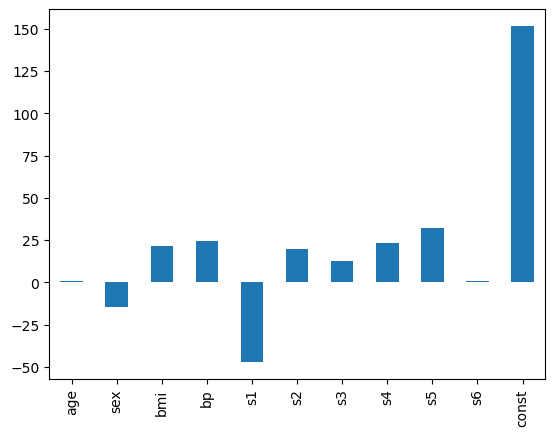

In [17]:
coeffs.gppd.X.plot.bar()

In [19]:
# abs_error is a Series of linear expressions
abs_error.head()

16       u[16] + v[16]
408    u[408] + v[408]
432    u[432] + v[432]
316    u[316] + v[316]
3          u[3] + v[3]
dtype: object

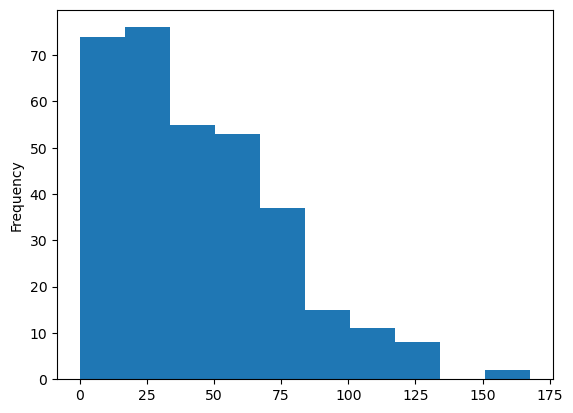

In [21]:
# .gppd.get_value() evaluates these expressions at the current solution
abs_error.gppd.get_value().plot.hist();